In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.utils import to_categorical
from keras import metrics
import matplotlib.pyplot as plt

In [51]:
data= pd.read_csv('1L_samples_rows.csv',header = None)
data = data[0:1000000]
label = data[0]
label = label.replace(-1,0)
data = data.drop(0,axis=1)
data.shape

(100000, 114)

In [52]:
data.head()

1    2    3         4         5         6    ...  109  110  111  112  113  114
0    0    0    0  0.053942  0.082759  0.176471  ...    0    0    0    1    0    0
1    0    1    0  0.091286  0.144828  0.117647  ...    0    1    0    1    0    0
2    0    1    0  0.020747  0.034483  0.058824  ...    0    0    0    1    0    0
3    0    0    0  0.045643  0.075862  0.117647  ...    0    0    0    1    0    0
4    0    1    0  0.029046  0.048276  0.058824  ...    0    1    0    1    0    0

[5 rows x 114 columns]

In [53]:
label.value_counts()

0    66336
1    33664
Name: 0, dtype: int64

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(data,label,stratify=label,random_state=42)

In [55]:
n_features = X_train.shape[1]
input_shape = (None,1,n_features)
X_train,X_test,Y_train,Y_test = np.array(X_train),np.array(X_test),np.array(Y_train),np.array(Y_test)
n_timesteps, n_features, n_outputs = 1, X_train.shape[1], 2
X_train = X_train.reshape((X_train.shape[0],1 , 1, n_features))
X_test = X_test.reshape((X_test.shape[0],1 , 1, n_features))
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [56]:
Y_test

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [57]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=input_shape))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size = 1)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(228))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(n_outputs,activation = 'softmax'))

In [58]:
epoch, batch_size, verbose= 50,32,1
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy','mse', 'mae',])
	# fit network
history = model.fit(X_train,Y_train,validation_data=(X_test, Y_test), epochs=epoch, batch_size=batch_size, verbose=verbose)
	# evaluate model


Epoch 1/50
2344/2344 [==============================] - 16s 7ms/step - loss: 0.0406 - accuracy: 0.9477 - mse: 0.0406 - mae: 0.0744 - val_loss: 0.0329 - val_accuracy: 0.9612 - val_mse: 0.0329 - val_mae: 0.0515
Epoch 2/50
2344/2344 [==============================] - 17s 7ms/step - loss: 0.0318 - accuracy: 0.9613 - mse: 0.0318 - mae: 0.0558 - val_loss: 0.0311 - val_accuracy: 0.9632 - val_mse: 0.0311 - val_mae: 0.0485
Epoch 3/50
2344/2344 [==============================] - 17s 7ms/step - loss: 0.0299 - accuracy: 0.9633 - mse: 0.0299 - mae: 0.0547 - val_loss: 0.0291 - val_accuracy: 0.9644 - val_mse: 0.0291 - val_mae: 0.0470
Epoch 4/50
2344/2344 [==============================] - 16s 7ms/step - loss: 0.0282 - accuracy: 0.9656 - mse: 0.0282 - mae: 0.0517 - val_loss: 0.0274 - val_accuracy: 0.9669 - val_mse: 0.0274 - val_mae: 0.0423
Epoch 5/50
2344/2344 [==============================] - 16s 7ms/step - loss: 0.0258 - accuracy: 0.9680 - mse: 0.0258 - mae: 0.0481 - val_loss: 0.0309 - val_accuracy

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

mse = history.history['mse']
val_mse = history.history['val_mse']

mae = history.history['mae']
val_mae = history.history['val_mae']

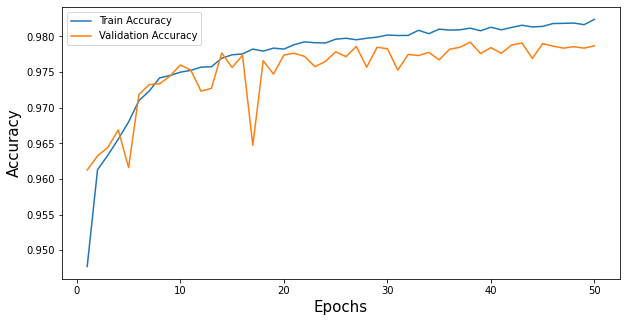

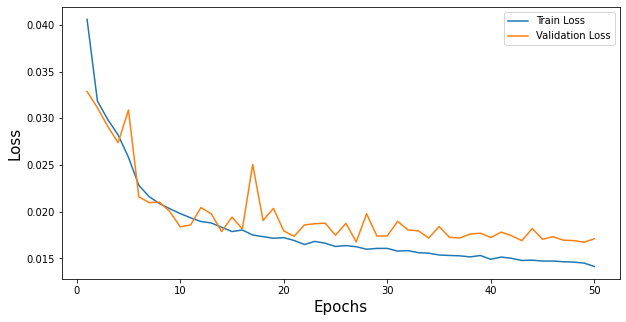

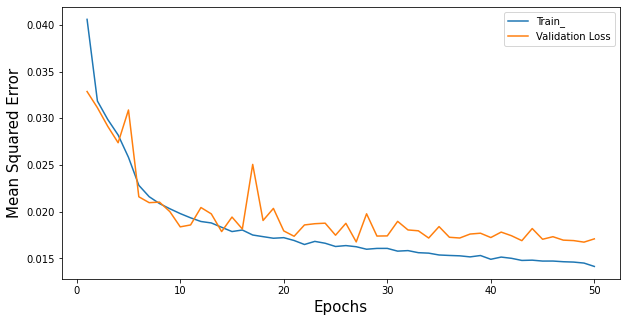

In [60]:
epochs = [i for i in range(1,epoch+1)]
plt.figure(num=1,figsize=(10,5))
plt.plot(epochs,acc,label= 'Train Accuracy')
plt.plot(epochs,val_acc,label= 'Validation Accuracy')
plt.legend()
plt.xlabel('Epochs',fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)

plt.figure(num=2,figsize=(10,5))
plt.plot(epochs,loss,label= 'Train Loss')
plt.plot(epochs,val_loss,label= 'Validation Loss')
plt.legend()
plt.xlabel('Epochs',fontsize = 15)
plt.ylabel('Loss',fontsize = 15)

plt.figure(num=3,figsize=(10,5))
plt.plot(epochs,mse,label= 'Train_')
plt.plot(epochs,val_mse,label= 'Validation Loss')
plt.legend()
plt.xlabel('Epochs',fontsize = 15)
plt.ylabel('Mean Squared Error',fontsize = 15)

plt.show()